In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
#from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error
#from sklearn.preprocessing import StandardScaler
#from sklearn.pipeline import make_pipeline

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
in_file='car data.csv'



In [16]:
data=pd.read_csv(in_file)
data

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0


In [17]:
data.head()

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [21]:
data.tail()

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
296,city,2016,9.50,11.6,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.9,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.0,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.5,9000,Diesel,Dealer,Manual,0
300,brio,2016,5.30,5.9,5464,Petrol,Dealer,Manual,0


In [18]:
data.describe()

,Year,Selling_Price,Present_Price,Driven_kms,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.642584,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Driven_kms     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Selling_type   301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [20]:
data.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Driven_kms       0
Fuel_Type        0
Selling_type     0
Transmission     0
Owner            0
dtype: int64

In [22]:
# Select relevant features and target variable
features = ["Year","Selling_Price", 
             "Present_Price","Driven_kms"]  
target = 'Selling_Price'

In [23]:
# Separate features (X) and target variable (y)
X = data[features]
y = data[target]


In [24]:
# Split the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [25]:
# Create a Decision Tree Regressor model
model = DecisionTreeRegressor(random_state=42)


In [26]:
# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

In [27]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'Mean Absolute Error: {mae}')

Mean Squared Error: 1.5067081967213118
Mean Absolute Error: 0.22459016393442618


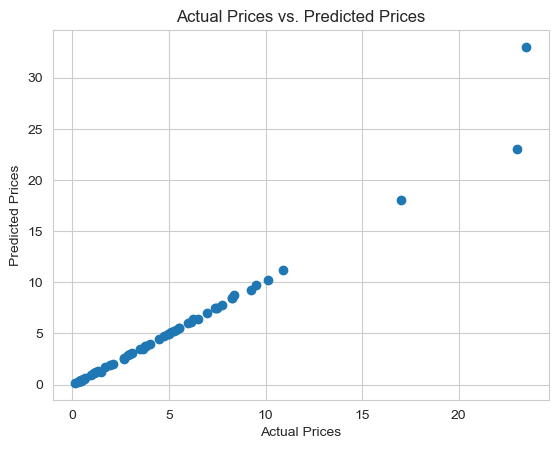

In [28]:
# Visualize predicted vs actual prices
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual Prices vs. Predicted Prices')
plt.show()

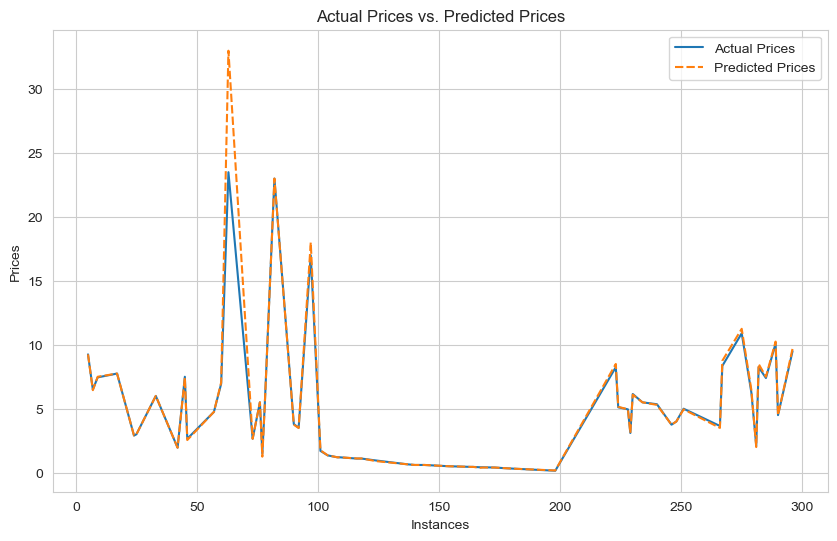

In [33]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=pd.DataFrame({'Actual Prices': y_test, 'Predicted Prices': y_pred}))
plt.xlabel('Instances')
plt.ylabel('Prices')
plt.title('Actual Prices vs. Predicted Prices')
plt.show()

#This visualization allows you to observe the relationship between actual and predicted prices for individual instances in the test set. It provides a different perspective compared to a scatter plot and may reveal patterns or trends in the model's performance.

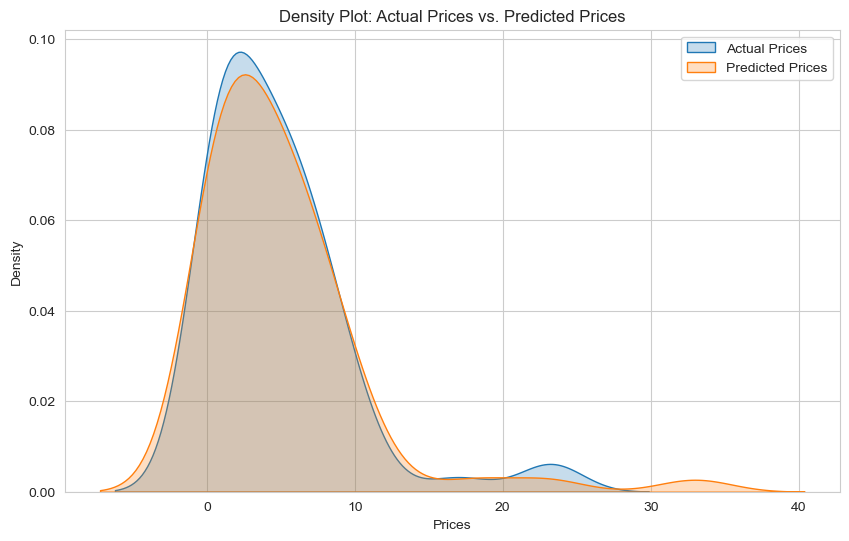

In [31]:
# Visualize the density plot of actual and predicted prices

plt.figure(figsize=(10, 6))
sns.kdeplot(y_test, label='Actual Prices', fill=True)
sns.kdeplot(y_pred, label='Predicted Prices', fill=True)
plt.xlabel('Prices')
plt.ylabel('Density')
plt.title('Density Plot: Actual Prices vs. Predicted Prices')
plt.legend()
plt.show()

In [8]:
#the correlation among all the features of this dataset

print(data.corr())

                   Year  Selling_Price  Present_Price  Driven_kms     Owner
Year           1.000000       0.236141      -0.047192   -0.524342 -0.182104
Selling_Price  0.236141       1.000000       0.878914    0.029187 -0.088344
Present_Price -0.047192       0.878914       1.000000    0.203618  0.008058
Driven_kms    -0.524342       0.029187       0.203618    1.000000  0.089216
Owner         -0.182104      -0.088344       0.008058    0.089216  1.000000


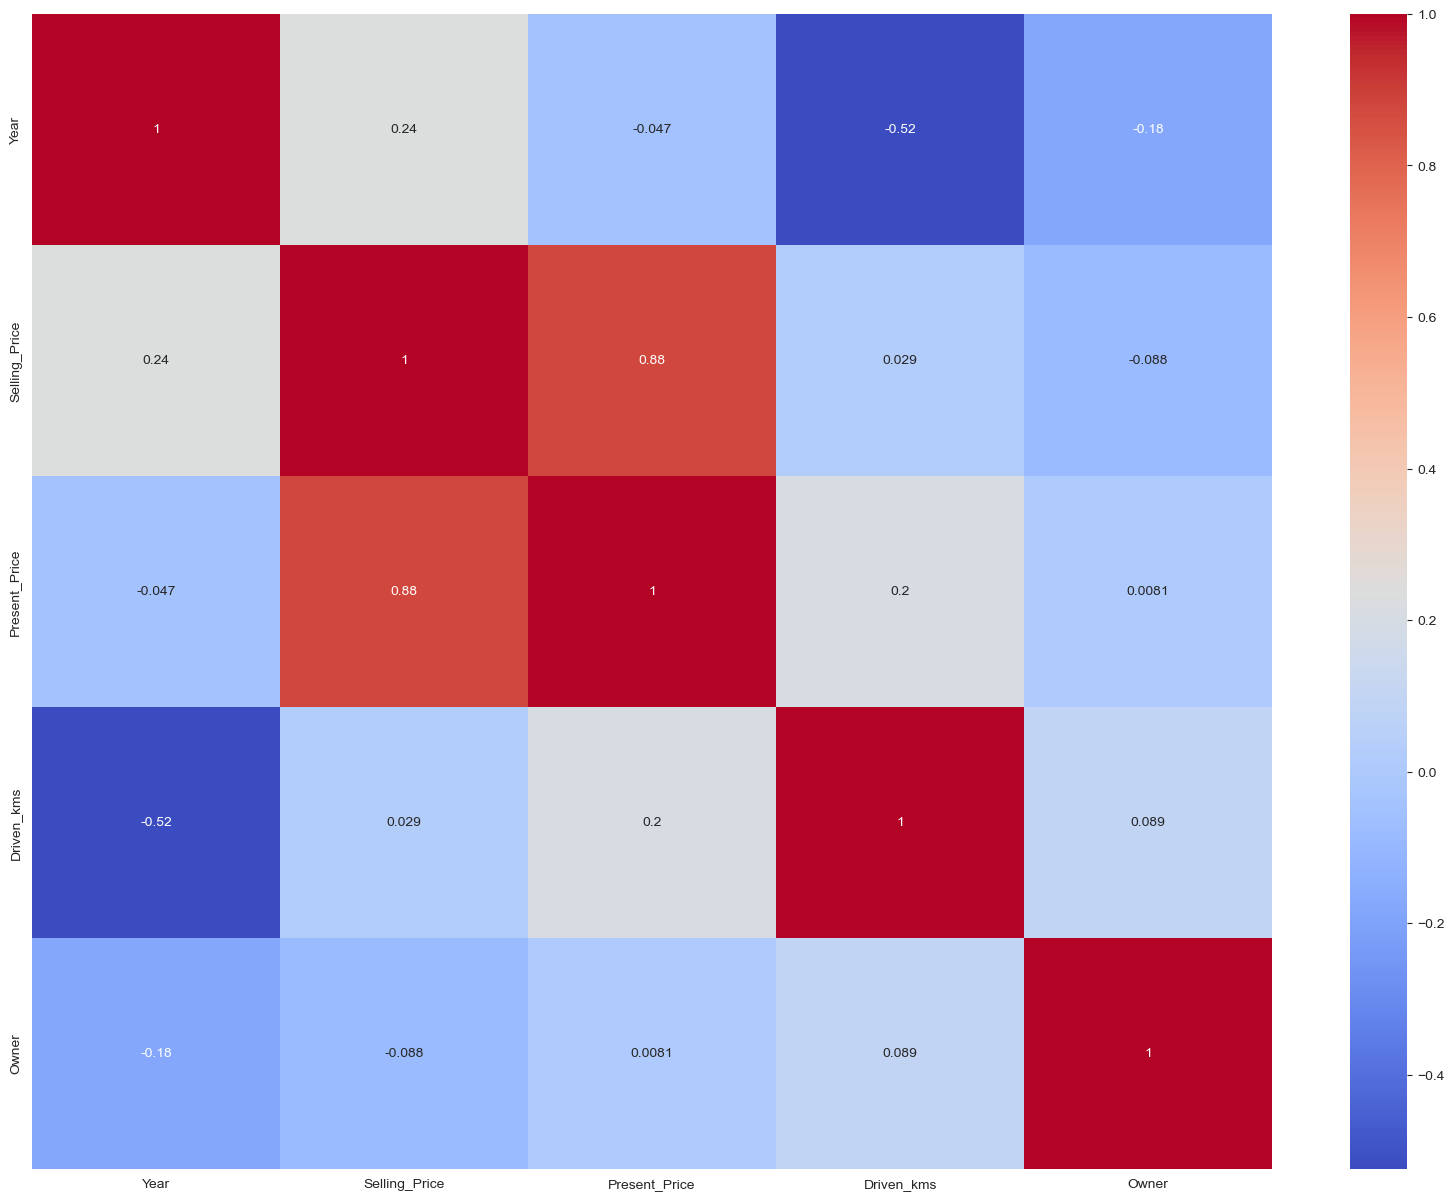

In [9]:
#visualising the date correlated data

plt.figure(figsize=(20, 15))
correlations = data.corr()
sns.heatmap(correlations, cmap="coolwarm", annot=True)
plt.show()

In [10]:
#Training a Car Price Prediction Model

# Assuming 'price' is the target variabl
X = data[['Present_Price', 'Driven_kms',]]  
y = data['Selling_Price']

# Split the data into training and test sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Decision Tree Regressor model
model = DecisionTreeRegressor(random_state=42)






In [11]:
# Train the model
model.fit(X_train, y_train)

DecisionTreeRegressor(random_state=42)